# Data understanding
In diesem Notebook werden die Daten der [Strassennamen](https://data.bs.ch/explore/dataset/100189/information/) des Kanton Basel-Stadt explorativ begutachtet.

---
## Laden der Daten

In [2]:
url = 'https://data.bs.ch/explore/dataset/100189/download/?format=csv&timezone=Europe/Zurich&lang=de&use_labels_for_header=true&csv_separator=%3B '

Daten in ein pandas-Dataframe abfüllen um eine tabelarische Übersicht über die Daten zu erhalten.
Sollte pandas nicht installiert sein `pip install pandas`

In [3]:
import pandas as pd

df = pd.read_csv(url, sep=';')
df.head()

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile,Geo Shape,Geo Point,Erstmals erwähnt,Amtlich benannt,Indextext,Kurztext
0,1267,Unterm Schellenberg,NaN,NaN,"{""coordinates"": [[[7.646100416914682, 47.57103...","47.57438530908011,7.647476787299508",NaN,NaN,SCH,Unterm Schellenberg
1,1311,Wendelinsgasse,NaN,NaN,"{""coordinates"": [[[7.652143633582508, 47.58464...","47.585508929842106,7.652674199435162",NaN,NaN,WEN,Wendelinsgasse
2,1197,Keltenweg,NaN,NaN,"{""coordinates"": [[[7.638296801699711, 47.57292...","47.57320240950238,7.635561106232719",NaN,NaN,KEL,Keltenweg
3,1095,Artelweg,NaN,NaN,"{""coordinates"": [[[7.664556024301177, 47.57864...","47.578660346190595,7.662622581792329",NaN,NaN,ART,Artelweg
4,1098,Auhaldenweg,NaN,NaN,"{""coordinates"": [[[7.664022858336189, 47.58385...","47.58413931663541,7.66205361334022",NaN,NaN,AUH,Auhaldenweg


---
## Daten begutachten

Prüfen auf Null-Values. Neben `Strassenname` sind vor allem die Spalten `Erklärung erste Zeile` und `Erklärung zweite Zeile` interessant. Diese enthalten die Beschreibungen zu der Strasse und oft auch einen Hinweis nach welchem Objekt die Strasse benannt ist.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id Strasse              1442 non-null   int64 
 1   Strassenname            1442 non-null   object
 2   Erklärung erste Zeile   1047 non-null   object
 3   Erklärung zweite Zeile  667 non-null    object
 4   Geo Shape               1442 non-null   object
 5   Geo Point               1442 non-null   object
 6   Erstmals erwähnt        283 non-null    object
 7   Amtlich benannt         1047 non-null   object
 8   Indextext               1442 non-null   object
 9   Kurztext                1442 non-null   object
dtypes: int64(1), object(9)
memory usage: 112.8+ KB


💡 Erkentnnis: Es gibt keine Datensätze ohne Strassennamen, jedoch solche ohne Erklärung.

### "Erklärung erste Zeile" was ist das?

In [25]:
dfErklarung = df[["Id Strasse","Strassenname","Erklärung erste Zeile","Erklärung zweite Zeile"]]
dfErklarung = dfErklarung.sort_values("Erklärung erste Zeile")
dfErklarung

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile
662,36,Achilles Bischoff-Strasse,"Achilles Bischoff (1795–1867), erster baselstädtischer Nationalrat",NaN
866,753,Ackermätteli,"Volkstümlicher Name,",abgeleitet von der benachbarten Ackerstrasse
194,745,Ackerstrasse,Vermutlich Hinweis auf die,landwirtschaftliche Vergangenheit der Gegend
620,1,Adlerstrasse,"Adlerberg (535 m ü.M.), Juraanhöhe",zwischen Pratteln und Liestal
1246,1363,Aegelgrabenweg,NaN,NaN
...,...,...,...,...
177,197,Zur Gempenfluh,"Gempenfluh oder Schartenfluh (759 m ü.M.),",Solothurner Juraanhöhe
1311,660,Zwingerstrasse,"Theodor Zwinger (1533–1588),",Arzt und Universalgelehrter
338,711,Zwölfjuchartenweglein,"In den zwölf Jucharten, ehemaliger Flurname",NaN
1072,971,Zähringerstrasse,"Zähringer, mittelalterliches Adelsgeschlecht",NaN


In [26]:
dfErklarung = dfErklarung.sort_values("Strassenname")
dfErklarung

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile
662,36,Achilles Bischoff-Strasse,"Achilles Bischoff (1795–1867), erster baselstädtischer Nationalrat",NaN
866,753,Ackermätteli,"Volkstümlicher Name,",abgeleitet von der benachbarten Ackerstrasse
194,745,Ackerstrasse,Vermutlich Hinweis auf die,landwirtschaftliche Vergangenheit der Gegend
620,1,Adlerstrasse,"Adlerberg (535 m ü.M.), Juraanhöhe",zwischen Pratteln und Liestal
1246,1363,Aegelgrabenweg,NaN,NaN
...,...,...,...,...
177,197,Zur Gempenfluh,"Gempenfluh oder Schartenfluh (759 m ü.M.),",Solothurner Juraanhöhe
1311,660,Zwingerstrasse,"Theodor Zwinger (1533–1588),",Arzt und Universalgelehrter
338,711,Zwölfjuchartenweglein,"In den zwölf Jucharten, ehemaliger Flurname",NaN
1072,971,Zähringerstrasse,"Zähringer, mittelalterliches Adelsgeschlecht",NaN


💡 Erkentnnis: Der Datensatz besteht neben dem Namen (`Strassenname`) aus einer Erklärung (`Erklärung erste Zeile`) welche den Name genauer Beschreibt plus einer präziseren Beschreibung der Erklärung (`Erklärung zweite Zeile`). Somit könnte für eine Wikidata-Objektzuweisung neben dem `Strassenname` auch  `Erklärung erste Zeile` verwendet werden. Die Zuweisung kann wiederum manuel mit der`Erklärung zweite Zeile` geprüft werden.

In [ ]:
# Nicht weiter wichtig: Zusammenführen der Spalten `Erklärung erste Zeile` mit `Erklärung zweite Zeile` in eine Spalte.

#pd.options.display.max_colwidth = 100
#dfErklarung["Erklärung"] = dfErklarung["Erklärung erste Zeile"] + " " + dfErklarung["Erklärung zweite Zeile"].fillna('')
#dfErklarung.head()

### Prüfen der NaN-Werten

In [221]:
a = len(df.query("`Erklärung erste Zeile`.isnull()"))
b = len(df.query("`Erklärung erste Zeile`.notnull() & `Erklärung zweite Zeile`.isnull()"))
c = len(df.query("`Erklärung erste Zeile`.notnull() & `Erklärung zweite Zeile`.notnull()"))

total = len(df['Erklärung erste Zeile'])

print(f"Anzahl Strassen SOLL: {total}, Anzahl Strassen IST: {a+b+c}, Differenz {total-a-b-c}")

Anzahl Strassen SOLL: 1442, Anzahl Strassen IST: 1442, Differenz 0


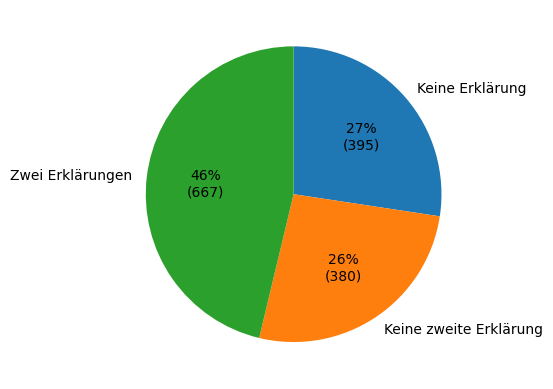

In [216]:
import matplotlib.pyplot as plt

labels = 'Keine Erklärung', 'Keine zweite Erklärung', 'Zwei Erklärungen'
values  = [a, b, c]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct=make_autopct(values), startangle=90, counterclock=False)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()